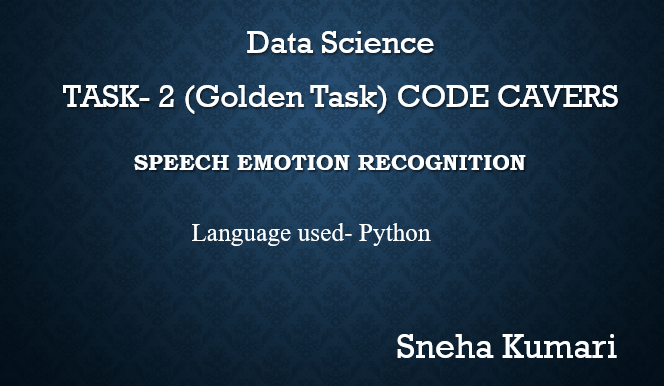

In [1]:
from IPython import display
display.Image("Code.png")

In [77]:
import os
import random
import sys

In [78]:
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)

In [79]:
from keras import regularizers
from keras.callbacks import  History
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import StratifiedShuffleSplit


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3

In [81]:
dir_list = os.listdir('data/')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [82]:
# Create DataFrame for Data intel
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                             'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('data/' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = 'data/' + i + '/' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
       # if nm[3] == '01':
        #    intensity = 0
        #else:
         #   intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, statement, repeat, emotion]
        count += 1

In [83]:
print (len(data_df))
data_df.head()

1440


,path,source,actor,gender,statement,repetition,emotion
0,data/Actor_01/03-01-01-01-01-01-01.wav,1,1,male,0,0,1
1,data/Actor_01/03-01-01-01-01-02-01.wav,1,1,male,0,1,1
2,data/Actor_01/03-01-01-01-02-01-01.wav,1,1,male,1,0,1
3,data/Actor_01/03-01-01-01-02-02-01.wav,1,1,male,1,1,1
4,data/Actor_01/03-01-02-01-01-01-01.wav,1,1,male,0,0,2


In [84]:

filename = data_df.path[121]
print (filename)
#print ("samyak")
samples, sample_rate = librosa.load(filename)
sample_rate, samples

data/Actor_03/03-01-01-01-01-02-03.wav


(22050, array([-6.0700299e-06, -3.5395646e-05, -2.4951731e-05, ...,
        -1.4991684e-05, -7.3881201e-06,  0.0000000e+00], dtype=float32))

In [85]:

len(samples), sample_rate

def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [86]:
sample_rate/ len(samples)

0.285425808706458

In [87]:
label2_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2: # Calm
        lb = "_positive"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"
        
    # Add gender to the label    
    label2_list.append(data_df.gender[i] + lb)
    
len(label2_list)

1440

In [88]:

label3_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1: # Neutral
        lb = "_neutral"
    elif data_df.emotion[i] == 2: # Calm
        lb = "_neutral"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"
    
    # Add gender to the label  
    label3_list.append(data_df.gender[i] + lb)
    
len(label3_list)

1440

In [89]:
label5_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"    
    else:
        lb = "_none"
    
    # Add gender to the label  
    label5_list.append(data_df.gender[i] + lb)
    
len(label5_list)

1440

In [90]:
label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 8:
        lb = "_surprised"
    else:
        lb = "_none"
        
    # Add gender to the label 
    label8_list.append(data_df.gender[i]  + lb)
    
len(label8_list)

1440

In [91]:

data_df['label'] = label2_list
#data_df['label'] = label3_list
#data_df['label'] = label5_list
#data_df['label'] = label8_list
data_df.head()

,path,source,actor,gender,statement,repetition,emotion,label
0,data/Actor_01/03-01-01-01-01-01-01.wav,1,1,male,0,0,1,male_none
1,data/Actor_01/03-01-01-01-01-02-01.wav,1,1,male,0,1,1,male_none
2,data/Actor_01/03-01-01-01-02-01-01.wav,1,1,male,1,0,1,male_none
3,data/Actor_01/03-01-01-01-02-02-01.wav,1,1,male,1,1,1,male_none
4,data/Actor_01/03-01-02-01-01-01-01.wav,1,1,male,0,0,2,male_positive


In [92]:
print (data_df.label.value_counts().keys())


Index(['male_negative', 'female_negative', 'female_none', 'male_none',
       'female_positive', 'male_positive'],
      dtype='object')


In [93]:

# def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
#     """
#     To plot the data distributioin by class.
#     Arg:
#       dist: pandas series of label count. 
#     """
#     tmp_df = pd.DataFrame()
#     tmp_df['Emotion'] = list(dist.keys())
#     tmp_df['Count'] = list(dist)
#     fig, ax = plt.subplots(figsize=(14, 7))
#     ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
#     ax.set_title(title)
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [94]:
# a = data_df.label.value_counts()
# plot_emotion_dist(a, "#2962FF", "Emotion Distribution")


In [95]:
data2_df = data_df.copy()
data2_df = data2_df[data2_df.label != "male_none"]
data2_df = data2_df[data2_df.label != "female_none"].reset_index(drop=True)
data2_df = data2_df[data2_df.label != "female_neutral"]
data2_df = data2_df[data2_df.label != "female_happy"]
data2_df = data2_df[data2_df.label != "female_angry"]
data2_df = data2_df[data2_df.label != "female_sad"]
data2_df = data2_df[data2_df.label != "female_fearful"]
data2_df = data2_df[data2_df.label != "female_calm"]
data2_df = data2_df[data2_df.label != "female_positive"]
data2_df = data2_df[data2_df.label != "female_negative"].reset_index(drop=True)

tmp1 = data2_df[data2_df.actor == 21]
tmp2 = data2_df[data2_df.actor == 22]
tmp3 = data2_df[data2_df.actor == 23]
tmp4 = data2_df[data2_df.actor == 24]
data3_df = pd.concat([tmp1, tmp3],ignore_index=True).reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 21]
data2_df = data2_df[data2_df.actor != 22]
data2_df = data2_df[data2_df.actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)
print (len(data2_df))
data2_df.head()

400


,path,source,actor,gender,statement,repetition,emotion,label
0,data/Actor_01/03-01-02-01-01-01-01.wav,1,1,male,0,0,2,male_positive
1,data/Actor_01/03-01-02-01-01-02-01.wav,1,1,male,0,1,2,male_positive
2,data/Actor_01/03-01-02-01-02-01-01.wav,1,1,male,1,0,2,male_positive
3,data/Actor_01/03-01-02-01-02-02-01.wav,1,1,male,1,1,2,male_positive
4,data/Actor_01/03-01-02-02-01-01-01.wav,1,1,male,0,0,2,male_positive


In [96]:
print (len(data3_df))
data3_df.head()

80


,path,source,actor,gender,statement,repetition,emotion,label
0,data/Actor_21/03-01-02-01-01-01-21.wav,1,21,male,0,0,2,male_positive
1,data/Actor_21/03-01-02-01-01-02-21.wav,1,21,male,0,1,2,male_positive
2,data/Actor_21/03-01-02-01-02-01-21.wav,1,21,male,1,0,2,male_positive
3,data/Actor_21/03-01-02-01-02-02-21.wav,1,21,male,1,1,2,male_positive
4,data/Actor_21/03-01-02-02-01-01-21.wav,1,21,male,0,0,2,male_positive


In [97]:

data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|██████████| 400/400 [00:14<00:00, 27.53it/s]


In [98]:
mfccs.shape

(259,)

In [22]:

data.head()

,feature
0,"[-70.26777, -70.26777, -70.26777, -70.26777, -..."
1,"[-67.55739, -67.55739, -67.55739, -67.55739, -..."
2,"[-69.67329, -69.693306, -69.693306, -69.693306..."
3,"[-69.0514, -69.0514, -69.0514, -69.0514, -69.0..."
4,"[-73.84137, -73.84137, -73.84137, -73.71965, -..."


In [23]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data2_df.label

df3.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-70.267769,-70.267769,-69.957710,-68.377602,-69.862564,-70.267769,-70.122139,-68.554955,-70.206528,-70.267769
1,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-65.239815,-65.536194,-67.557388,-67.557388,...,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.126572,-67.557388
2,-69.673286,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.620773,-69.693306,-68.906570,...,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.383514,-69.693306,-69.693306,-69.693306,-69.693306
3,-69.051399,-69.051399,-69.051399,-69.051399,-69.051399,-68.754860,-69.051399,-69.051399,-69.051399,-68.359085,...,-65.446953,-68.552094,-69.051399,-69.051399,-69.051399,-68.688614,-69.051399,NaN,NaN,NaN
4,-73.841370,-73.841370,-73.841370,-73.719650,-73.841370,-73.841370,-73.841370,-73.303635,-72.806808,-73.841370,...,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370


In [24]:
newdf = pd.concat([df3,labels], axis=1)

In [25]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-70.267769,-69.957710,-68.377602,-69.862564,-70.267769,-70.122139,-68.554955,-70.206528,-70.267769,male_positive
1,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-65.239815,-65.536194,-67.557388,-67.557388,...,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.126572,-67.557388,male_positive
2,-69.673286,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.620773,-69.693306,-68.906570,...,-69.693306,-69.693306,-69.693306,-69.693306,-69.383514,-69.693306,-69.693306,-69.693306,-69.693306,male_positive
3,-69.051399,-69.051399,-69.051399,-69.051399,-69.051399,-68.754860,-69.051399,-69.051399,-69.051399,-68.359085,...,-68.552094,-69.051399,-69.051399,-69.051399,-68.688614,-69.051399,NaN,NaN,NaN,male_positive
4,-73.841370,-73.841370,-73.841370,-73.719650,-73.841370,-73.841370,-73.841370,-73.303635,-72.806808,-73.841370,...,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,male_positive
5,-69.243256,-69.243256,-69.243256,-69.243256,-68.901970,-67.983002,-68.089203,-67.897331,-65.258011,-67.170975,...,-57.185970,-61.188725,-67.108391,-67.508125,-66.245537,-68.733047,-69.243256,-69.243256,-69.243256,male_positive
6,-73.254967,-73.254967,-73.254967,-73.254967,-68.774429,-69.380402,-73.254967,-73.254967,-73.254967,-73.254967,...,-50.884079,-55.666733,-54.600002,-53.439114,-56.300125,-57.458267,-58.767071,-59.836510,-58.409870,male_positive
7,-70.746513,-70.746513,-70.025284,-69.131271,-70.746513,-70.746513,-70.746513,-70.746513,-70.746513,-70.746513,...,-70.746513,-70.746513,-70.079247,-69.590454,-69.202751,-70.159462,-70.445366,-68.199043,-67.414200,male_positive
8,-63.311062,-63.072487,-63.412422,-63.796757,-63.581989,-58.921223,-57.955044,-61.224972,-63.782932,-63.796757,...,-63.740608,-62.410255,-62.489079,-62.494453,-62.632626,-62.824276,NaN,NaN,NaN,male_positive
9,-60.369045,-60.083717,-60.978924,-60.952457,-60.982483,-60.983948,-60.981255,-60.981255,-60.981255,-60.249615,...,-60.981255,-60.981255,-60.981255,-60.981255,-60.981255,-60.981255,NaN,NaN,NaN,male_positive


In [26]:
rnewdf.isnull().sum().sum()

rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-70.267769,-69.957710,-68.377602,-69.862564,-70.267769,-70.122139,-68.554955,-70.206528,-70.267769,male_positive
1,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-65.239815,-65.536194,-67.557388,-67.557388,...,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.126572,-67.557388,male_positive
2,-69.673286,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.620773,-69.693306,-68.906570,...,-69.693306,-69.693306,-69.693306,-69.693306,-69.383514,-69.693306,-69.693306,-69.693306,-69.693306,male_positive
3,-69.051399,-69.051399,-69.051399,-69.051399,-69.051399,-68.754860,-69.051399,-69.051399,-69.051399,-68.359085,...,-68.552094,-69.051399,-69.051399,-69.051399,-68.688614,-69.051399,0.000000,0.000000,0.000000,male_positive
4,-73.841370,-73.841370,-73.841370,-73.719650,-73.841370,-73.841370,-73.841370,-73.303635,-72.806808,-73.841370,...,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,male_positive


In [27]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

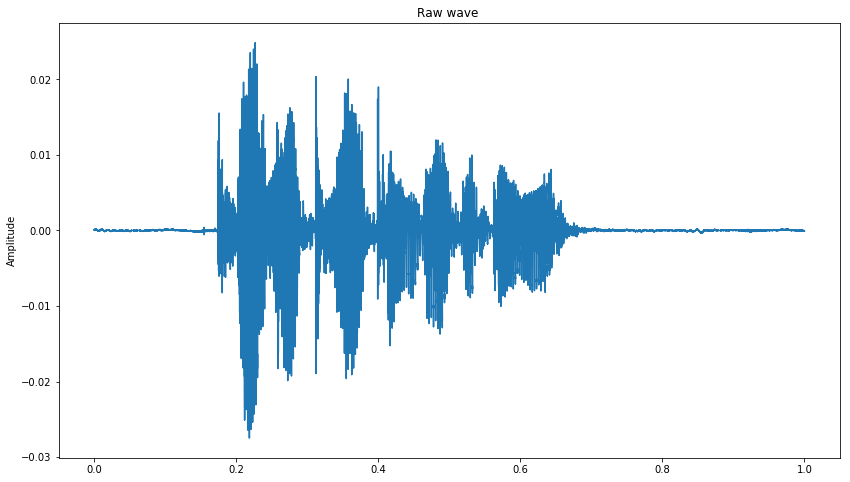

In [28]:

X, sample_rate = librosa.load(data2_df.path[216], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

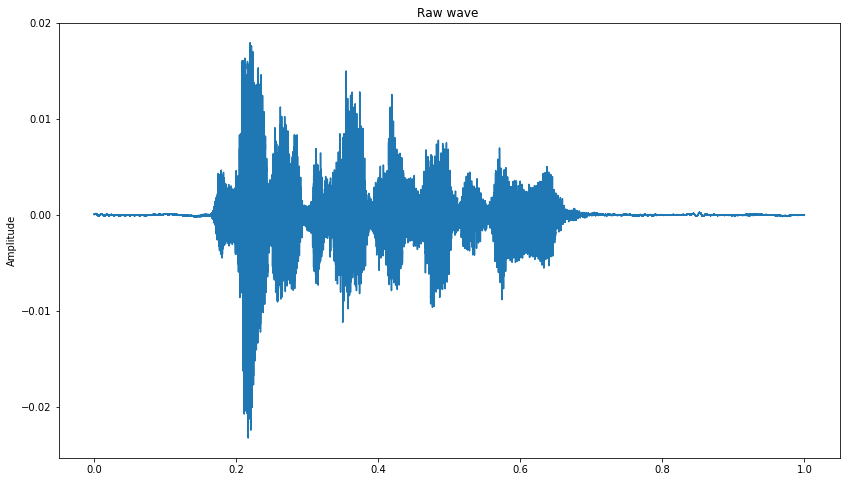

In [29]:

x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

In [30]:
# Augmentation Method 1

syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 400/400 [00:16<00:00, 23.51it/s]


In [53]:
mfccs.shape

(259,)

In [31]:
# Augmentation Method 2

syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 400/400 [01:15<00:00,  5.11it/s]


In [32]:
len(syn_data1), len(syn_data2)

(400, 400)

In [33]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [34]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

syndf1.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-58.206749,-55.749172,-55.094097,-58.077942,-59.965324,-60.338055,-59.059612,-54.831863,-54.266373,-56.149399,...,-56.376968,-56.422245,-58.023674,-57.493351,-57.761662,-58.468845,-57.723019,-58.953934,-57.524841,male_positive
1,-54.707405,-54.768959,-55.891453,-54.833084,-57.632000,-56.500813,-53.743435,-53.149773,-54.777317,-55.058212,...,-55.916523,-57.212181,-54.268215,-55.214191,-55.300686,-56.631897,-53.749283,-55.502850,-53.762589,male_positive
2,-69.284828,-68.763336,-69.686821,-69.682625,-69.693512,-69.693512,-69.713081,-69.725800,-69.693512,-68.940659,...,-69.693512,-69.693512,-69.693512,-69.697075,-68.967804,-69.450027,-69.561897,-69.693512,-69.693512,male_positive
3,-57.208927,-56.159134,-56.550621,-56.630417,-55.766487,-55.059998,-56.869766,-54.332504,-52.623589,-54.659172,...,-55.368912,-55.915054,-55.888096,-54.083721,-55.863178,-55.708370,0.000000,0.000000,0.000000,male_positive
4,-58.009464,-56.925838,-61.090446,-61.339859,-59.064537,-57.405273,-59.763191,-61.837807,-61.975388,-60.467075,...,-60.219219,-59.739605,-57.883980,-57.858372,-61.081856,-58.157017,-58.688023,-59.592369,-57.991776,male_positive


In [35]:

df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
len(syndf2)

syndf2.head()


,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-71.092476,-71.092476,-71.092476,-71.092476,-71.092476,-71.092476,-71.092476,-71.092476,-71.092476,-71.092476,...,-71.092476,-70.898605,-70.830894,-70.779060,-71.069603,-71.023300,-70.786835,-71.092476,-71.092476,male_positive
1,-70.534630,-70.534630,-70.511139,-70.534630,-70.534630,-69.789101,-69.337868,-70.335907,-70.534630,-70.534630,...,-70.534630,-70.534630,-70.534630,-70.534630,-70.534630,-70.534630,-70.400139,-69.654121,-70.534630,male_positive
2,-71.282516,-71.344063,-71.754143,-71.754143,-71.754143,-71.754143,-71.754143,-71.754143,-71.754143,-70.753822,...,-71.754143,-71.754143,-71.754143,-71.754143,-71.754143,-71.754143,-71.754143,-71.754143,-71.754143,male_positive
3,-69.884552,-69.884552,-69.884552,-69.884552,-69.884552,-69.884552,-69.884552,-69.884552,-69.884552,-69.884552,...,-69.526909,-69.884552,-69.884552,-69.884552,-69.884552,-69.884552,0.000000,0.000000,0.000000,male_positive
4,-74.693588,-74.693588,-74.688530,-74.693588,-74.693588,-74.693588,-74.693588,-74.454514,-74.505119,-74.693588,...,-74.693588,-74.693588,-74.693588,-74.693588,-74.693588,-74.693588,-74.693588,-74.693588,-74.693588,male_positive


In [36]:

combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-70.267769,-69.957710,-68.377602,-69.862564,-70.267769,-70.122139,-68.554955,-70.206528,-70.267769,male_positive
1,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-65.239815,-65.536194,-67.557388,-67.557388,...,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.126572,-67.557388,male_positive
2,-69.673286,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.620773,-69.693306,-68.906570,...,-69.693306,-69.693306,-69.693306,-69.693306,-69.383514,-69.693306,-69.693306,-69.693306,-69.693306,male_positive
3,-69.051399,-69.051399,-69.051399,-69.051399,-69.051399,-68.754860,-69.051399,-69.051399,-69.051399,-68.359085,...,-68.552094,-69.051399,-69.051399,-69.051399,-68.688614,-69.051399,0.000000,0.000000,0.000000,male_positive
4,-73.841370,-73.841370,-73.841370,-73.719650,-73.841370,-73.841370,-73.841370,-73.303635,-72.806808,-73.841370,...,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,male_positive


In [37]:
X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [38]:
y_train.value_counts()

male_negative    576
male_positive    384
Name: label, dtype: int64

In [39]:

y_test.value_counts()

male_negative    144
male_positive     96
Name: label, dtype: int64

In [40]:
X_train.isna().sum().sum()

0

In [41]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [42]:
y_train

X_train.shape

(960, 259)

In [43]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [44]:

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [45]:
model = Sequential()
model.add(Conv1D(256, 2,padding='same', input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 2,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 2,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 2,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 2,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 2,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(lr=0.00001, decay=1e-6)

W0510 19:06:14.123137 13600 deprecation_wrapper.py:119] From C:\Users\samya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 259, 256)          768       
_________________________________________________________________
activation_1 (Activation)    (None, 259, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 259, 128)          65664     
_________________________________________________________________
activation_2 (Activation)    (None, 259, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 259, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 32, 128)          

In [47]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', fscore])

In [48]:
#lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
#mcp_save = ModelCheckpoint('model/aug_noiseNshift_2class2_np.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=400)

W0510 19:06:25.776410 13600 deprecation_wrapper.py:119] From C:\Users\samya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/400
960/960 [==============================] - ETA: 12s - loss: 0.6291 - accuracy: 0.7188 - fscore: 0.71 - ETA: 7s - loss: 0.7187 - accuracy: 0.5938 - fscore: 0.5937 - ETA: 5s - loss: 0.7189 - accuracy: 0.5729 - fscore: 0.572 - ETA: 4s - loss: 0.6640 - accuracy: 0.6406 - fscore: 0.640 - ETA: 3s - loss: 0.6665 - accuracy: 0.6250 - fscore: 0.625 - ETA: 3s - loss: 0.6809 - accuracy: 0.6146 - fscore: 0.614 - ETA: 2s - loss: 0.6728 - accuracy: 0.6205 - fscore: 0.620 - ETA: 2s - loss: 0.6772 - accuracy: 0.6133 - fscore: 0.613 - ETA: 2s - loss: 0.6911 - accuracy: 0.6076 - fscore: 0.607 - ETA: 1s - loss: 0.6831 - accuracy: 0.6156 - fscore: 0.615 - ETA: 1s - loss: 0.6844 - accuracy: 0.6222 - fscore: 0.622 - ETA: 1s - loss: 0.6931 - accuracy: 0.6068 - fscore: 0.606 - ETA: 1s - loss: 0.6980 - accuracy: 0.6058 - fscore: 0.605 - ETA: 1s - loss: 0.7018 - accuracy: 0.6027 - fscore: 0.602 - ETA: 1s - loss: 0.7009 - accuracy: 0.5979 - fscore: 0.597 - ETA: 1s - loss: 0.7002 - accuracy: 0.5977 - 

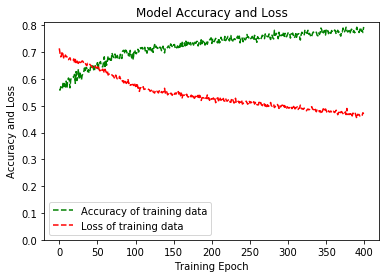

In [50]:
plt.figure(figsize=(6, 4))
plt.plot(cnnhistory.history['accuracy'], "g--", label="Accuracy of training data")
plt.plot(cnnhistory.history['loss'], "r--", label="Loss of training data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()
